# Emotion Detection CNN

## Importing Libraries

In [23]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


## Loading the Model architecture and weights

In [24]:

# Loading the model architecture from a JSON file )
with open('model_a.json', 'r') as json_file:
    model_json = json_file.read()
model = model_from_json(model_json)

# Loading the weights into the model
model.load_weights('model_weights.h5')

## Loading and Preprocessing the Input Image

In [25]:

# Loading the image using PIL
img_path = 'img.jpeg'
img = Image.open(img_path)

# Converting to grayscale
img = img.convert('L')  # 'L' mode is for grayscale

# Resizing the image to 48x48 pixels
img = img.resize((48, 48))

# Converting the image to an array
img_array = image.img_to_array(img)

# Expanding dimensions to match the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Normalizing the image data
img_array /= 255.0  # Ensure the values are in the range [0, 1]


## Model Prediction

In [26]:

# Getting the model prediction
predictions = model.predict(img_array)

1/1 [==============================] - 0s 49ms/step


## Visualizing Convolutional Layer Output

1/1 [==============================] - 0s 26ms/step


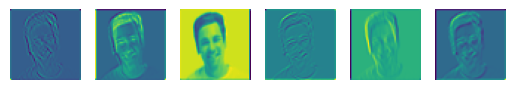

In [27]:

# Selecting a convolutional layer
layer_name = 'conv2d_5'  #layer name
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Getting the activation map for the input image
intermediate_output = intermediate_layer_model.predict(img_array)

# Visualizing the first 6 activation maps of the selected layer
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(intermediate_output[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()

